# 3 points in 2D with Delaunay

In [1]:
import lindelint as ldi
import numpy as np
import matplotlib.pyplot as plt

In [23]:
lbox=10

n_vertices = 4
max_module = 2.0

vertices = np.random.uniform(-lbox+max_module, lbox-max_module, (n_vertices, 2))
v_vertices = np.random.uniform(-1, 1, (n_vertices, 2))
v_vertices = max_module*v_vertices/np.linalg.norm(np.ravel(v_vertices))

vertices[0,:]=[-5,5]
vertices[1,:]=[-5,-5]
vertices[2,:]=[7,0]
vertices[3,:]=[7,-7]

In [24]:
interpolator = ldi.Interpolator(vertices, v_vertices)

In [25]:
n_points = 500
points = np.random.uniform(-10, 10, (n_points, 2))

In [26]:
v_points = interpolator.do_your_thing(points)

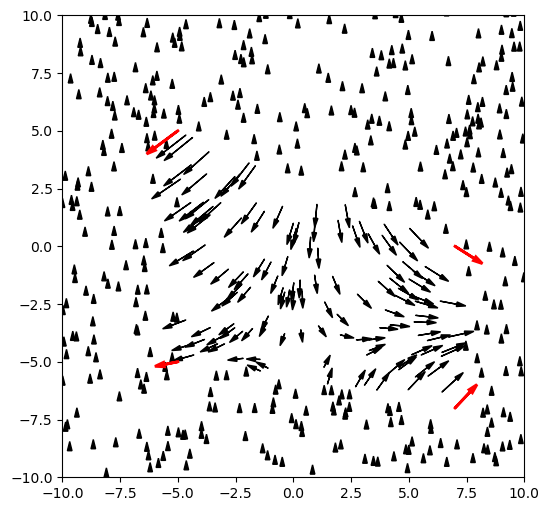

In [27]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
        head_width=0.2, head_length=0.4, fc='k', ec='k')
    
for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r', lw=2.0)

    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()

In [28]:
interpolator.delaunay.find_simplex([0,-10])

array(-1, dtype=int32)

In [29]:
_, closest_point_index = interpolator._kdtree.query([0,-10])

In [30]:
closest_point_index

1

In [31]:
interpolator.delaunay.vertex_to_simplex

array([0, 0, 0, 1], dtype=int32)

In [33]:
interpolator.delaunay.convex_hull

array([[2, 0],
       [1, 0],
       [3, 2],
       [1, 3]], dtype=int32)

In [ ]:
def barycentric_coords2(vertices, point):
    v = vertices[1]-vertices[0]
    d = np.linalg.norm(v)
    u = v/d
    p = point - vertices[0]
    f = np.dot(p, u)/d
    return 1.0-f, f

In [ ]:
all_bcoords3 = []

for ii in range(n_points):
    
    alpha, beta, gamma = barycentric_coords3(vertices, points[ii])
    all_bcoords3.append(np.array([alpha, beta, gamma]))

    if (alpha<0):
        alpha = 0.0
        beta, gamma = barycentric_coords2([vertices[1], vertices[2]], points[ii])
        if beta<0:
            beta = 0.0
            gamma = 1.0
        elif beta>1:
            beta = 1.0
            gamma = 0.0
    elif (beta<0):
        beta = 0.0
        alpha, gamma = barycentric_coords2([vertices[0], vertices[2]], points[ii])
        if alpha<0:
            alpha = 0.0
            gamma = 1.0
        elif alpha>1:
            alpha = 1.0
            gamma = 0.0
    elif (gamma<0):
        gamma = 0.0
        alpha, beta = barycentric_coords2([vertices[0], vertices[1]], points[ii])
        if alpha<0:
            alpha = 0.0
            beta = 1.0
        elif alpha>1:
            alpha = 1.0
            beta = 0.0

    v_points[ii] = alpha*v_vertices[0]+beta*v_vertices[1]+gamma*v_vertices[2]

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
        head_width=0.2, head_length=0.4, fc='k', ec='k')
    
for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r', lw=2.0)

    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()